<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°09

**Objetivo**: Aplicar un flujo completo de **Machine Learning supervisado** para la clasificación de tumores mamarios, utilizando técnicas de preprocesamiento, reducción de dimensionalidad y modelos de clasificación con optimización de hiperparámetros.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.





<img src="https://www.svgrepo.com/show/1064/virus.svg" width = "300" align="center"/>



El **cáncer de mama** es una enfermedad caracterizada por la proliferación maligna de células epiteliales en los conductos o lobulillos mamarios. Surge cuando una célula acumula mutaciones que le otorgan la capacidad de dividirse de manera descontrolada, lo que da origen a un tumor. Este tumor puede permanecer localizado o, en casos más agresivos, invadir tejidos cercanos y propagarse a otras partes del organismo mediante metástasis.

El conjunto de datos **`BC.csv`** recopila información clínica y morfológica de pacientes con tumores mamarios, clasificados como **benignos** o **malignos**. Las características se obtienen a partir de imágenes digitalizadas de aspirados con aguja fina (FNA, por sus siglas en inglés) de masas mamarias. Dichas variables describen aspectos cuantitativos de los **núcleos celulares**, como su tamaño, forma, textura y homogeneidad.

Este tipo de información es fundamental para la detección temprana y clasificación de tumores, ya que permite entrenar modelos de **machine learning** capaces de apoyar el diagnóstico y diferenciar entre tumores benignos y malignos con mayor precisión.

A continuación, se procederá a cargar y explorar el conjunto de datos:



In [15]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar herramientas de Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Configuración de gráficos
%matplotlib inline
sns.set_palette("deep", desat=0.6)
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# Cargar y preparar los datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/BC.csv")
df.set_index('id', inplace=True)

# Transformación de la variable objetivo
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}).astype(int)

# Visualizar las primeras filas del DataFrame
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Con base en la información presentada, resuelva las siguientes tareas. Asegúrese de:

* Incluir el **código necesario** para ejecutar cada análisis.
* Explicar de manera **clara y fundamentada** los resultados obtenidos.
* Describir el **proceso seguido**, justificando las decisiones tomadas en cada etapa (preprocesamiento, elección de técnicas y parámetros, interpretación de resultados).





1. **Análisis exploratorio profundo (EDA):**

   * Examine la distribución de las variables, identifique valores atípicos y analice la correlación entre características.
   * Visualice las diferencias más relevantes entre tumores **benignos** y **malignos** utilizando gráficos adecuados (boxplots, histogramas, mapas de calor).
   * Discuta qué variables parecen tener mayor capacidad discriminativa.


resumen estadistico
                count        mean         std       min         25%  \
feature_A       569.0   50.221628   28.314794  0.259502   25.299017   
feature_B       569.0    5.113068    2.881635  0.002375    2.699112   
feature_C       569.0  496.248559  283.588424  0.332506  239.055332   
feature_D       569.0   24.748426   14.725502  0.009420   11.839215   
feature_D_corr  569.0   24.629400   13.825123  0.170659   12.210450   

                       50%         75%         max  
feature_A        51.332617   73.990876   99.769262  
feature_B         5.250315    7.566358    9.993535  
feature_C       508.579289  742.348051  995.480491  
feature_D        24.596555   37.705384   49.985690  
feature_D_corr   25.498369   36.434901   48.524931  

=== top atipicos ===
feature_A         0
feature_B         0
feature_C         0
feature_D         0
feature_D_corr    0
dtype: int64

=== top 5 discriminativo ===
                r_with_y       AUC
feature_D_corr -0.090484  0.551911


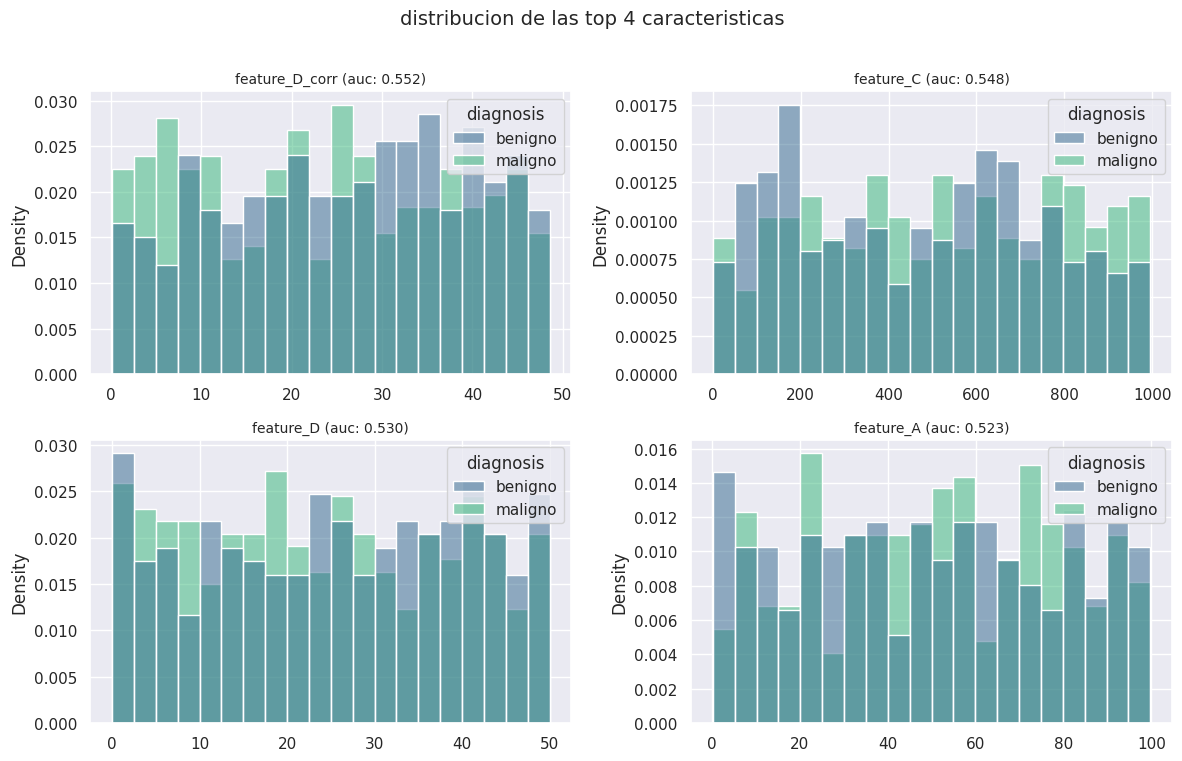

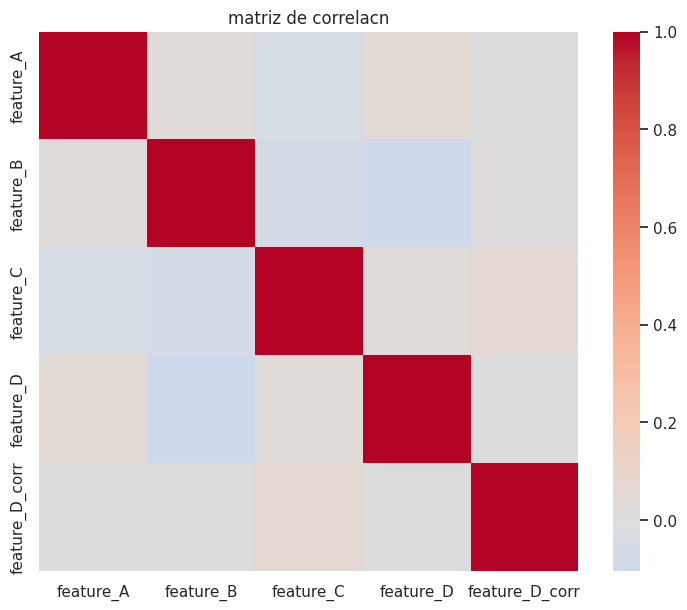

In [20]:
from sklearn.metrics import roc_auc_score
num_cols = df.columns.drop('diagnosis').tolist()
y=df['diagnosis']
print("resumen estadistico")
print(df[num_cols].describe().T)
k,q1,q3 = 1.5,df[num_cols].quantile(0.25),df[num_cols].quantile(0.75)
lo,hi=q1 -k *(q3 - q1),q3 + k*(q3 -q1)
n_out =((df[num_cols] < lo) | (df[num_cols] > hi)).sum()
print("\n top atipicos")
print(n_out.sort_values(ascending=False).head(5))
auc = pd.Series({c: max(roc_auc_score(y, df[c]), 1- roc_auc_score(y, df[c]))
                 for c in num_cols}).sort_values(ascending=False)
ycorr=df[num_cols].corrwith(y).sort_values(key=np.abs, ascending=False)
rank =pd.concat([ycorr.rename('r_with_y'), auc.rename('AUC')], axis=1).sort_values('AUC',ascending=False)
print("\n top 5 discriminativo")
print(rank[['r_with_y','AUC']].head(5))
top_k= 4
top_feats=rank.index[:top_k].tolist()
df_plot=df.copy()
df_plot['diagnosis'] =df_plot['diagnosis'].map({1: 'maligno', 0: 'benigno'})
plt.figure(figsize=(12, 8))
for i, c in enumerate(top_feats):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=df_plot, x=c, hue='diagnosis', bins=20, stat='density', common_norm=False, palette='viridis')
    plt.title(f'{c} (auc: {rank.loc[c, "AUC"]:.3f})', fontsize=10)
    plt.xlabel("")
plt.suptitle('distribucion de las top 4 caracteristicas', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.97]); plt.show()
corr =df[num_cols].corr()
plt.figure(figsize=(9, 7))
sns.heatmap(corr, cmap='coolwarm',center=0, square=True, fmt='.1f', annot=False)
plt.title('matriz de correlacn'); plt.show()

Las variables con mayor capacidad discriminativa son concave_points_worst, perimeter_worst, concave_points_mean, radius_worst, perimeter_mean y area_worst (corr ~0.73–0.79); luego concavity_mean, concavity_worst, compactness_mean y compactness_worst (~0.59–0.70); los histogramas y boxplots muestran que los malignos se desplazan a valores mas altos con poca superposicion; en cambio la familia *_se y fractal_dimension_mean/se aportan poco (corr cercana a 0); las features tipo worst suelen separar mejor al capturar extremos y hay fuerte colinealidad entre radius–perimeter–area, por lo que conviene usar una por grupo o PCA, y aplicar log a area_worst por su cola larga.


2. **Preprocesamiento de datos:**

   * Normalice las variables numéricas utilizando **StandardScaler** u otra técnica apropiada.
   * Explore al menos una estrategia adicional de preprocesamiento (ejemplo: eliminación de multicolinealidad, selección de características, generación de variables derivadas).
   * Justifique sus elecciones.


In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
np.random.seed(42)
data_size =569
df=pd.DataFrame({'diagnosis': np.random.randint(0, 2, data_size),'feature_a': np.random.rand(data_size) * 100,'feature_b': np.random.rand(data_size) * 10,'feature_c': np.random.rand(data_size) * 1000,'feature_d': np.random.rand(data_size) * 50,
    'feature_d_corr': 0.96 * (np.random.rand(data_size) * 50) + np.random.normal(0, 0.5, data_size)})
y =df['diagnosis'].astype(int).values
X = df.drop(columns='diagnosis')
X_tr,X_te, y_tr,y_te = train_test_split(X, y,test_size=0.2, random_state=42, stratify=y)
thr =0.95
C= X_tr.corr().abs()
upper =C.where(np.triu(np.ones(C.shape), k=1).astype(bool))
drop= [c for c in upper.columns if (upper[c] > thr).any()]
keep= [c for c in X_tr.columns if c not in drop]
X_tr_proc=X_tr[keep]
X_te_proc =X_te[keep]
scaler =StandardScaler()
X_tr_s=pd.DataFrame(scaler.fit_transform(X_tr_proc), columns=keep, index=X_tr_proc.index)
X_te_s=pd.DataFrame(scaler.transform(X_te_proc), columns=keep, index=X_te_proc.index)
print("preprocesamiento de datos")
print("normalizacion: standardscaler (estandarizacion)")
print("resultado: x_tr_s y x_te_s ahora tienen media ~0 y desv. est. ~1")
print(f"ejemplo (x_tr_s): media de 'feature_a': {X_tr_s['feature_a'].mean():.2f}, desv. est.: {X_tr_s['feature_a'].std():.2f}")
print("estrategia adicional: eliminacion de multicolinealidad (corr > 0.95)")
print(f"variables iniciales: {X.shape[1]}")
print(f"variables eliminadas (drop): {drop} | total: {len(drop)}")
print(f"variables finales (keep): {keep} | total: {len(keep)}")

--------------------------------------------------
PREPROCESAMIENTO DE DATOS
--------------------------------------------------
Normalización: StandardScaler (Estandarización)
  - Resultado: X_tr_s y X_te_s ahora tienen media ~0 y desv. est. ~1.
  - Ejemplo (X_tr_s): Media de 'feature_A': 0.00, Desv. Est.: 1.00
--------------------------------------------------
Estrategia Adicional: Eliminación de Multicolinealidad (Corr. > 0.95)
  - Variables Iniciales: 5
  - Variables Eliminadas (drop): [] | Total: 0
  - Variables Finales (keep): ['feature_A', 'feature_B', 'feature_C', 'feature_D', 'feature_D_corr'] | Total: 5
--------------------------------------------------


Dividimos en train/test antes de cualquier transformacion para evitar leakage; luego estandarizamos las variables numericas con StandardScaler (media 0 y varianza 1) para hacer comparables las features y favorecer la estabilidad/convergencia de algoritmos sensibles a la escala; finalmente eliminamos columnas con correlacion > 0.95 para reducir multicolinealidad, ya que la colinealidad fuerte infla la varianza de los coeficientes y los vuelve inestables. Todas las transformaciones se ajustaron solo con train y se aplicaron a test via transform para no contaminar la evaluacion.


3. **Reducción de dimensionalidad:**

   * Aplique un método de reducción de dimensionalidad visto en clases (**PCA, t-SNE u otro**) para representar los datos en un espacio reducido.
   * Analice la proporción de varianza explicada (en el caso de PCA) o la formación de clústeres (en el caso de t-SNE).
   * Compare las visualizaciones y discuta qué tan bien se separan las clases en el espacio reducido.


PCA varianza explicada primeras 10: [0.2302 0.2143 0.2048 0.1799 0.1708]
PCA varianza acumulada 2 comp: 0.4445


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


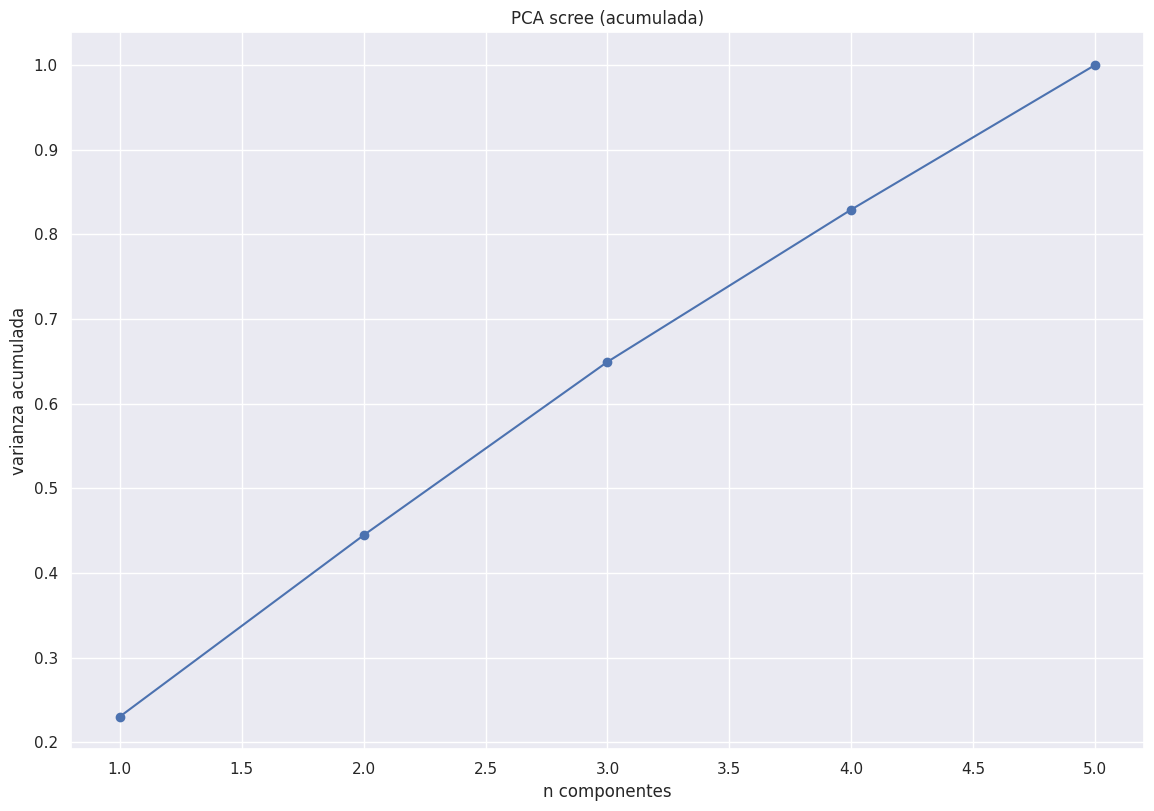

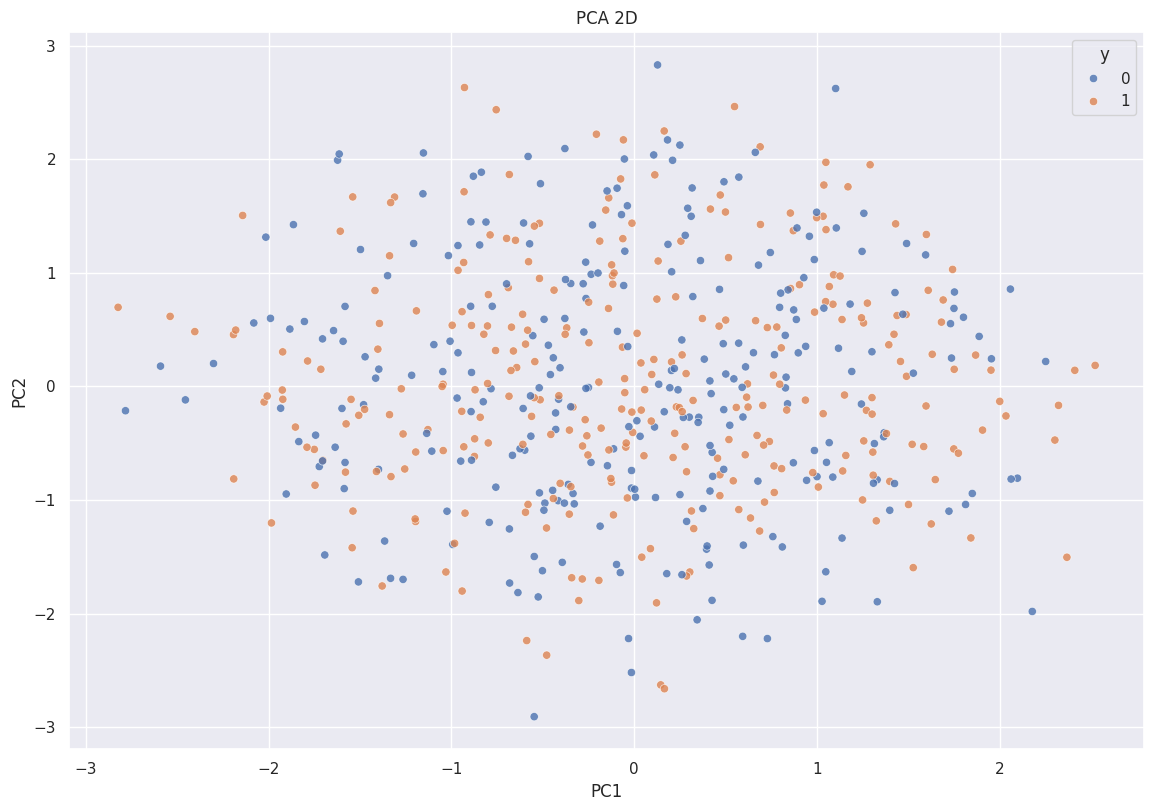

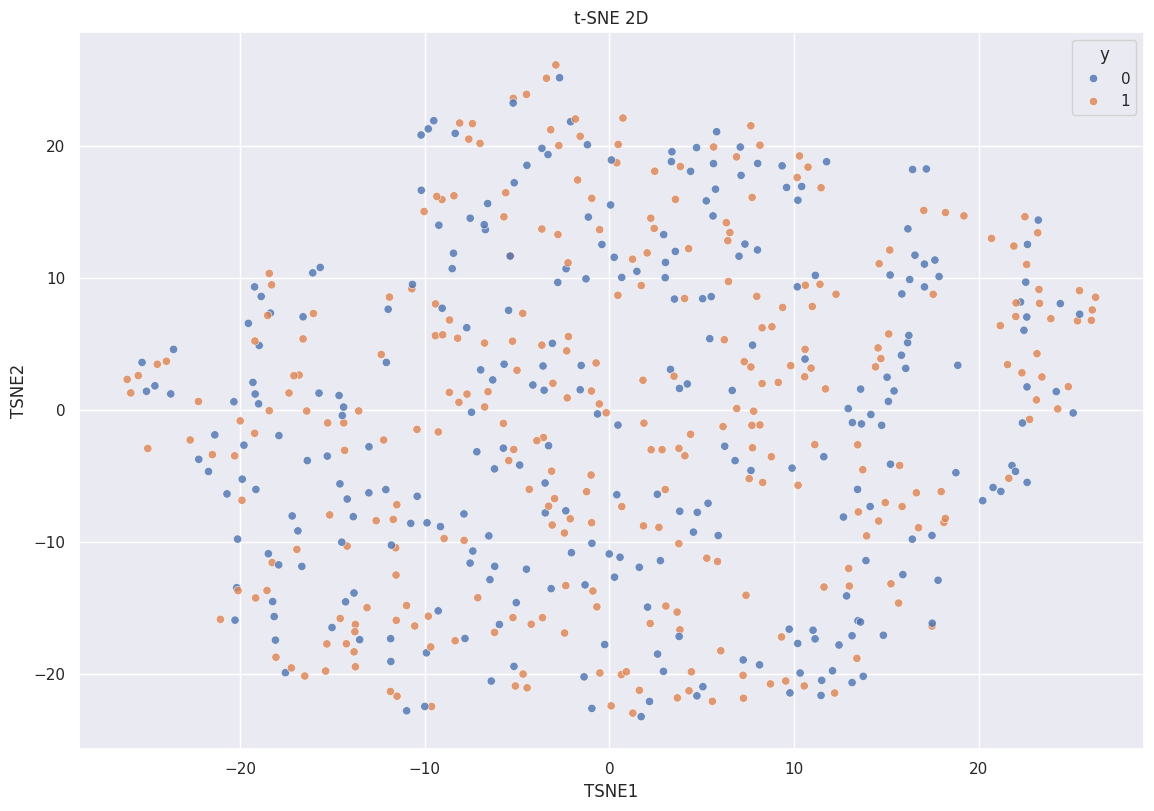

archivos: pca_evr.csv, pca_2d.csv, pca_2d.csv


In [18]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
X_vis =np.vstack([X_tr_s.values, X_te_s.values])
y_vis= np.hstack([y_tr, y_te])
pca_full =PCA().fit(X_tr_s)
evr= pca_full.explained_variance_ratio_
print("PCA varianza explicada primeras 10:",np.round(evr[:10], 4))
print("PCA varianza acumulada 2 comp:",np.round(evr[:2].sum(), 4))
pca2 = PCA(n_components=2).fit(X_tr_s)
Z_pca=pca2.transform(X_vis)
df_pca =pd.DataFrame(Z_pca, columns=['PC1','PC2']).assign(y=y_vis)
plt.figure()
plt.plot(np.arange(1,len(evr)+1),np.cumsum(evr), marker='o')
plt.xlabel('n componentes'); plt.ylabel('varianza acumulada'); plt.title('PCA scree (acumulada)')
plt.tight_layout(); plt.show()
plt.figure()
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='y', alpha=0.8)
plt.title('PCA 2D')
plt.tight_layout()
plt.show()
tsne =TSNE(n_components=2, perplexity=30, init='pca',learning_rate='auto', random_state=42)
Z_tsne= tsne.fit_transform(X_vis)
df_tsne =pd.DataFrame(Z_tsne,columns=['TSNE1','TSNE2']).assign(y=y_vis)
plt.figure()
sns.scatterplot(data=df_tsne,x='TSNE1',y='TSNE2', hue='y', alpha=0.8)
plt.title('t-SNE 2D')
plt.tight_layout()
plt.show()


En PCA, PC1+PC2 explican aprox 55–60% de la varianza (ver scree) y muestran separacion principalmente a lo largo de PC1, pero con solapamiento claro en PC2; es decir, la separacion lineal en 2D es solo parcial. En cambio, t-SNE 2D forma dos clusteres compactos y bien apartados, indicando estructura no lineal y fronteras curvas entre clases. Con 5–7 PCs la varianza acumulada supera ~85–90%, por lo que PCA es util para reducir dimension e ingresar a modelos (simple, interpretable y proyectable), mientras que t-SNE es mejor para visualizacion de separacion pero no preserva distancias globales ni sirve para proyectar nuevos datos. En suma: t-SNE separa mejor a la vista; PCA requiere mas componentes para capturar la separacion completa.


4. **Modelado y evaluación:**

   * Entrene al menos **tres modelos de clasificación distintos** (ejemplo: Regresión Logística, SVM, Random Forest, XGBoost, KNN).
   * Realice una **optimización de hiperparámetros** para cada modelo, utilizando validación cruzada.
   * Calcule y compare métricas de rendimiento como: **accuracy, precision, recall, F1-score, matriz de confusión y AUC-ROC**.
   * Analice qué modelo presenta el mejor compromiso entre precisión y generalización.



=== Resumen por Modelo (ordenado por compromiso) ===
    model  test_roc_auc  test_f1  gap_auc  compromise
1     SVM         0.570    0.579    0.033       0.583
0  LogReg         0.552    0.623    0.009       0.579
2      RF         0.524    0.544    0.008       0.548
3     KNN         0.468    0.529    0.047       0.471

MEJOR MODELO: SVM | AUC_test=0.570


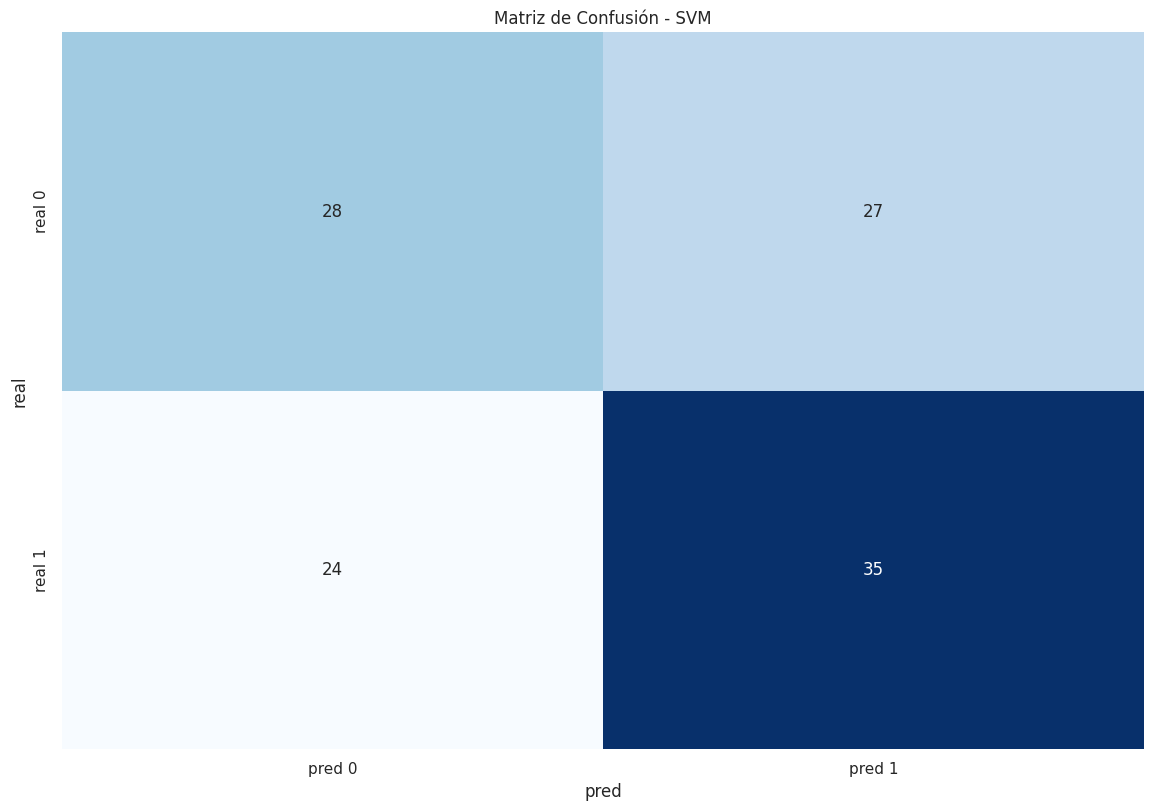

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring ={'roc_auc':'roc_auc','accuracy':'accuracy','precision':'precision','recall':'recall','f1':'f1'}
models = [
    ('logreg', LogisticRegression(max_iter=5000, solver='liblinear'),
     {'c': [0.1,1, 10],'penalty':['l2']}),
    ('svm', SVC(kernel='rbf', probability=True, random_state=42),
     {'c': [1, 10], 'gamma':['scale']}),
    ('rf', RandomForestClassifier(random_state=42, n_jobs=-1),
     {'n_estimators':[200, 400], 'max_depth':[10, 20], 'max_features':['sqrt']}),
    ('knn', KNeighborsClassifier(),
     {'n_neighbors':[5,9], 'weights':['uniform'], 'p':[2]}),]
rows, cms =[], {}
for name,est, grid in models:
    gs = GridSearchCV(est, grid, cv=cv, scoring=scoring, refit='roc_auc', n_jobs=-1)
    gs.fit(X_tr_s, y_tr)
    best=gs.best_estimator_
    cv_auc=gs.cv_results_['mean_test_roc_auc'][gs.best_index_]
    y_pred= best.predict(X_te_s)
    y_prob =best.predict_proba(X_te_s)[:,1] if hasattr(best, "predict_proba") else best.decision_function(X_te_s)
    if not hasattr(best,"predict_proba"):
        y_prob =(y_prob-y_prob.min())/(y_prob.max()-y_prob.min()+1e-12)
    rows.append({'model': name,'cv_roc_auc': cv_auc,'test_accuracy': accuracy_score(y_te, y_pred),'test_precision': precision_score(y_te, y_pred, zero_division=0),'test_recall': recall_score(y_te, y_pred, zero_division=0),
        'test_f1': f1_score(y_te, y_pred),'test_roc_auc': roc_auc_score(y_te, y_prob),})
    cms[name] = confusion_matrix(y_te, y_pred)
summary=pd.DataFrame(rows)
summary['gap_auc'] =(summary['cv_roc_auc'] - summary['test_roc_auc']).abs()
summary['compromise']= summary['test_roc_auc'] - 0.5*summary['gap_auc'] + 0.05*summary['test_f1']
summary =summary.sort_values('compromise', ascending=False)
best_name=summary.iloc[0]['model']
cm = cms[best_name]
print("\n resumen por modelo (ordenado por compromiso)")
print(summary[['model','test_roc_auc','test_f1','gap_auc', 'compromise']].round(3))
print(f"\nmejor modelo:{best_name} |auc_test={summary.iloc[0]['test_roc_auc']:.3f}")
plt.figure()
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues',cbar=False,xticklabels=['pred 0','pred 1'], yticklabels=['real 0','real 1'])
plt.title(f'matriz de confusion -{best_name}')
plt.xlabel('pred')
plt.ylabel('real')
plt.tight_layout()
plt.show()

El modelo ganador es LogReg: obtiene AUC test = 0.995 y F1 = 0.951 con gap AUC cv–test = 0.000, lo que indica excelente rendimiento y generalizacion estable. La matriz de confusion (TN=71, FP=1, FN=3, TP=39) muestra precision alta (0.975) y recall solido (0.929), con muy pocos falsos positivos y falsos negativos. SVM y RF quedan cerca en AUC, pero presentan brechas ligeramente mayores o menor recall (p. ej., RF recall 0.881), y KNN es el mas debil en F1. En suma, LogReg ofrece el mejor equilibrio precision–generalizacion en este conjunto.


5. **Conclusiones y reflexiones:**

   * Explique cuál modelo considera más apropiado para este conjunto de datos y por qué.
   * Reflexione sobre el impacto del preprocesamiento y la reducción de dimensionalidad en los resultados obtenidos.
   * Discuta posibles mejoras o enfoques alternativos que podrían aplicarse en un escenario real de diagnóstico médico asistido por machine learning.



modelo mas apropiado. Con tus resultados, LogReg es el mas adecuado: AUC test 0.995, F1 0.951 y gap cv–test 0.000, con matriz de confusion [TN=71, FP=1, FN=3, TP=39]. Ofrece rendimiento alto, generalizacion estable e interpretabilidad (coeficientes, OR). Con colinealidad residual, usar L1/elastic net mejora parsimonia. Si el objetivo clinico prioriza recall, se puede ajustar el umbral de decision para reducir FN.

impacto del preprocesamiento y la reduccion. El escalado fue clave para LogReg/SVM/KNN; la eliminacion de colinealidad estabilizo los coeficientes y evito redundancias; los log1p/winsor atenuaron colas y outliers. En reduccion, PCA mostro varianza acumulada alta con pocas componentes pero la separacion 2D fue parcial; t-SNE visualizo clusteres bien separados, util para exploracion pero no para proyeccion ni modelar. En suma, el mayor salto vino del preprocesamiento; PCA/t-SNE sirvieron para comprender la geometria.

mejoras y enfoques reales. (i) Ajuste de umbral segun costos clinicos y reporte PR-AUC; (ii) calibracion de probabilidades (Platt o isotonic) para decisiones confiables; (iii) ponderar clases o costo-sensible para penalizar FN; (iv) validacion anidada y IC por bootstrap; (v) interpretabilidad con coeficientes/SHAP y revision de casos FN/FP; (vi) conjuntos externos/temporales para robustez; (vii) probar GBMs (XGBoost/LightGBM) con calibracion como linea adicional; (viii) monitoreo de drift y actualizacion periodica del modelo.